In [1]:
%pip install pygraphviz
# !sudo apt-get install software-properties-common
# !sudo apt-get install graphviz graphviz-dev

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install torch_geometric

Note: you may need to restart the kernel to use updated packages.


In [1]:
from graph import Graph
from graph_nca import GraphNCA
# from growing_nn.graph.generated_network import GeneratedNetwork
# from ezrl.optimizer import RLOptimizer
# from ezrl.policy import GymPolicy
# from ezrl.algorithms.reinforce import ReinforceOptimizer

/home/pakhi/Documents/gsoc/gsoc-2024/ndp/env/lib/python3.10/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [2]:
NUM_OPERATIONS = 3
NUM_ACTIVATIONS = 2
NUM_HIDDEN_CHANNELS = 4

NUM_CHANNELS = GraphNCA.get_number_of_channels(NUM_OPERATIONS, NUM_ACTIVATIONS, NUM_HIDDEN_CHANNELS)

In [3]:
NUM_CHANNELS

11

KeyError: 2

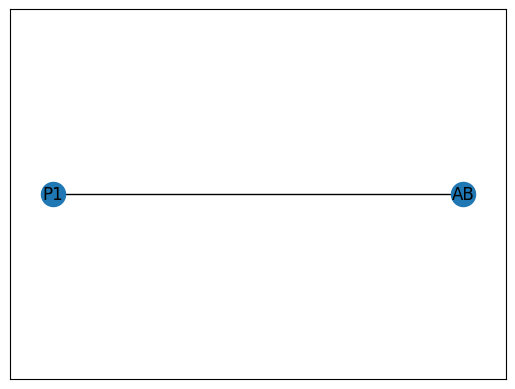

In [5]:
import torch
import numpy as np

x = torch.randn((2, NUM_CHANNELS))
x[0,1] = 1.0

edge_dict = {0:[1], 1:[]}
label_dict = {0:"P1", 1:"AB", 2:"C", 3:"D", 4:"E", 5:"F", 6:"G", 7:"H", 8:"I", 9:"J"}
# edge_dict = {0:[2,3], 1:[2,3], 2:[], 3:[2], 4:[3,1], 5:[4,3], 6:[5,4], 7:[6,3], 8:[2,5,7], 9:[7,8,6]}
# x = torch.randn((6, NUM_CHANNELS))
# edge_dict = {0:[2, 4], 1:[2, 3, 4], 4:[5], 5:[2, 3], 2:[], 3:[]}

graph = Graph(x, edge_dict)
image = graph.plot(labels=label_dict)    

In [15]:
# Image.fromarray(image).save("minimal_net.png")

In [16]:
# print("INPUT NODES", graph.input_nodes)
# print("OUTPUT NODES", graph.output_nodes)

In [17]:
import torch.distributions as td

def loss_fn(logits, actions, rewards):
    categorical = td.categorical.Categorical(logits=logits)
    log_probs = -categorical.log_prob(actions)
    return torch.sum(rewards*log_probs)

In [18]:
nca = GraphNCA(graph, NUM_HIDDEN_CHANNELS)
optimizer = torch.optim.Adam(nca.parameters(), lr=0.001)

In [19]:
list(nca.parameters())

[Parameter containing:
 tensor([[-0.0494, -0.1660,  0.0979,  ..., -0.2409,  0.0017,  0.1821],
         [-0.1551,  0.1274, -0.2111,  ...,  0.1989,  0.0465, -0.0484],
         [-0.1391, -0.1755,  0.0299,  ..., -0.2399, -0.0432,  0.1792],
         ...,
         [-0.0114,  0.2521, -0.0915,  ...,  0.1343,  0.1675, -0.0096],
         [-0.0369,  0.2053, -0.0779,  ..., -0.1024, -0.1541,  0.2027],
         [-0.0049,  0.0938, -0.0152,  ...,  0.1543, -0.0760, -0.1034]],
        requires_grad=True),
 Parameter containing:
 tensor([[ 0.0195,  0.0088,  0.1014,  ...,  0.0041,  0.0292,  0.0778],
         [ 0.0135, -0.0946, -0.0834,  ...,  0.1000,  0.0685, -0.0904],
         [ 0.0250,  0.0904, -0.0190,  ...,  0.0050, -0.0949, -0.0094],
         ...,
         [-0.1140,  0.0737, -0.0592,  ...,  0.1049, -0.0541,  0.1061],
         [ 0.0417,  0.0531, -0.1035,  ...,  0.1113,  0.0610,  0.0360],
         [ 0.0460, -0.0420,  0.0267,  ..., -0.0540,  0.1070, -0.0017]],
        requires_grad=True),
 Parameter con

In [20]:
print(nca.graph.to_data())

Data(x=[2, 23], edge_index=[2, 1])


In [21]:
# actions = torch.ones((32, 1)).long()
# optimizer.zero_grad()
# graph = nca.grow(graph = nca.graph, parent_index=2)
# generated_network = graph.generate_network()
# outputs, nodes = generated_network.batch_forward(torch.randn(32, 2))
# loss = loss_fn(outputs, actions, torch.ones((32,1))*2)
# loss.backward()
# optimizer.step()

In [22]:
list(nca.parameters())

[Parameter containing:
 tensor([[-0.0494, -0.1660,  0.0979,  ..., -0.2409,  0.0017,  0.1821],
         [-0.1551,  0.1274, -0.2111,  ...,  0.1989,  0.0465, -0.0484],
         [-0.1391, -0.1755,  0.0299,  ..., -0.2399, -0.0432,  0.1792],
         ...,
         [-0.0114,  0.2521, -0.0915,  ...,  0.1343,  0.1675, -0.0096],
         [-0.0369,  0.2053, -0.0779,  ..., -0.1024, -0.1541,  0.2027],
         [-0.0049,  0.0938, -0.0152,  ...,  0.1543, -0.0760, -0.1034]],
        requires_grad=True),
 Parameter containing:
 tensor([[ 0.0195,  0.0088,  0.1014,  ...,  0.0041,  0.0292,  0.0778],
         [ 0.0135, -0.0946, -0.0834,  ...,  0.1000,  0.0685, -0.0904],
         [ 0.0250,  0.0904, -0.0190,  ...,  0.0050, -0.0949, -0.0094],
         ...,
         [-0.1140,  0.0737, -0.0592,  ...,  0.1049, -0.0541,  0.1061],
         [ 0.0417,  0.0531, -0.1035,  ...,  0.1113,  0.0610,  0.0360],
         [ 0.0460, -0.0420,  0.0267,  ..., -0.0540,  0.1070, -0.0017]],
        requires_grad=True),
 Parameter con

In [23]:
from matplotlib import pyplot as plt
from celluloid import Camera
from IPython.display import HTML

fig = plt.figure()
camera = Camera(fig)

images = []
img = graph.plot(fig=fig)
fig.clear()
images.append(img)
for i in range(10):
    print("ini graph",graph.nodes.size())
    graph = nca.grow(graph = graph, parent_index=i)
    print("returned graph",graph.nodes.size())
    print("------")
    img = graph.plot(fig=fig)
    # camera.snap()
    fig.clear()
    images.append(img)

# animation = camera.animate()

ini graph torch.Size([2, 23])
ini graph in grow torch.Size([2, 23])
grown graph torch.Size([3, 23])
returned graph torch.Size([3, 23])
------
ini graph torch.Size([3, 23])
ini graph in grow torch.Size([3, 23])
grown graph torch.Size([4, 23])
returned graph torch.Size([4, 23])
------
ini graph torch.Size([4, 23])
ini graph in grow torch.Size([4, 23])
grown graph torch.Size([5, 23])
returned graph torch.Size([5, 23])
------
ini graph torch.Size([5, 23])
ini graph in grow torch.Size([5, 23])
grown graph torch.Size([6, 23])
returned graph torch.Size([6, 23])
------
ini graph torch.Size([6, 23])
ini graph in grow torch.Size([6, 23])
grown graph torch.Size([7, 23])
returned graph torch.Size([7, 23])
------
ini graph torch.Size([7, 23])
ini graph in grow torch.Size([7, 23])
grown graph torch.Size([8, 23])
returned graph torch.Size([8, 23])
------
ini graph torch.Size([8, 23])
ini graph in grow torch.Size([8, 23])
grown graph torch.Size([9, 23])
returned graph torch.Size([9, 23])
------
ini gr

<Figure size 640x480 with 0 Axes>

In [24]:
graph.nodes.size()

torch.Size([12, 23])

In [25]:
# generated_network = graph.generate_network()

In [26]:
# outputs, nodes = generated_network.batch_forward(torch.randn(32, 2))

In [27]:
# nodes.size()

In [28]:
# from functorch import vmap

# def batch_forward(inp):
#     return generated_network(inp)

# examples = torch.randn(32, 2)

# result = vmap(batch_forward, randomness='different')(examples)

In [29]:
from PIL import Image

In [30]:
imgs = [Image.fromarray(img) for img in images]


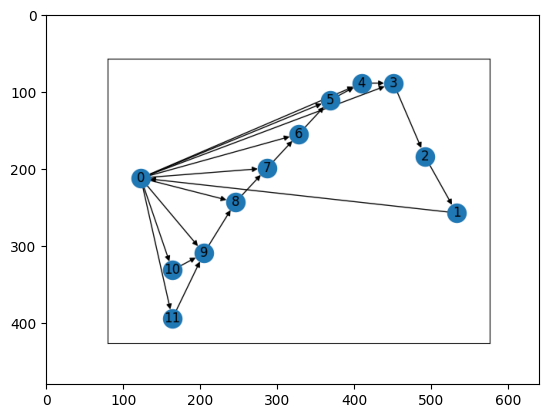

In [31]:
plt.imshow(images[-1])

In [32]:
Image.fromarray(images[1]).save("next_step.png")

In [33]:
imgs[0].save("array2.gif", save_all=True, append_images=imgs[1:], duration=1000, loop=0)

In [ ]:
HTML(animation.to_html5_video())


NameError: name 'animation' is not defined

In [ ]:
generated_network = GeneratedNetwork(graph)

In [11]:
generated_network(torch.ones(2))[graph.output_nodes]

tensor([[-14.3090],
        [ 67.7032]], grad_fn=<IndexBackward0>)

#### RL

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from typing import Any, Dict, Optional, Callable
import torch.distributions as td
import numpy as np
import gym

In [5]:
# from ezrl.optimizer import RLOptimizer
# from ezrl.policy import GymPolicy
# from ezrl.algorithms.reinforce import ReinforceOptimizer

In [11]:
from growing_nn.graph.directed_graph import DirectedGraph
from growing_nn.graph.graph_nca import GraphNCA
from growing_nn.graph.generated_network import GeneratedNetwork
from ezrl.optimizer import RLOptimizer
from ezrl.policy import GymPolicy
from ezrl.algorithms.reinforce import ReinforceOptimizer

In [6]:
env = gym.make("LunarLander-v2")

/home/shyam/anaconda3/envs/pytorch_geometric/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/shyam/anaconda3/envs/pytorch_geometric/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [24]:
class LunarLanderNCAPolicy(GymPolicy):
    def __init__(self, nca, num_growth_steps: int = 3):
        super().__init__()
        self.input_dims = 8
        self.output_dims = 4
        self.num_growth_steps = num_growth_steps

        self.nca = nca

    def generate_network(self, num_steps):
        graph = self.nca.grow(self.nca.graph, num_steps)
        generated_network = graph.generate_network()
        return generated_network

    def forward(self, obs: Any, generated_network = None) -> Dict[str, Any]:
        if generated_network is not None:
            generated_network = self.generate_network(self.num_growth_steps)
        logits = generated_network.batch_forward(inputs=obs)
        dist = td.Categorical(logits=logits)
        action = dist.sample()
        return {"action":action, "dist":dist}

    def act(self, obs: Any, generated_network = None):
        out = self.forward(obs, generated_network)
        return out["action"].item(), out

In [25]:
def reinforce_rollout(
    policy: GymPolicy, env_name: str = None, env=None, env_creation_fn=None
):
    if env_name is None and env is None:
        raise ValueError("env_name or env must be provided!")
    if env is None:
        if env_creation_fn is None:
            env_creation_fn = gym.make
        env = env_creation_fn(env_name)
    done = False
    observations, actions, rewards = (
        [],
        [],
        [],
    )
    observation = env.reset()
    with torch.no_grad():
        generated_network = policy.generate_network(policy.num_growth_steps)
        while not done:
            action, out = policy.act(
                torch.from_numpy(observation).unsqueeze(0).to(policy.device), generated_network
            )
            next_observation, reward, done, info = env.step(action)

            observations.append(observation)
            actions.append(action)
            rewards.append(reward)

            observation = next_observation

    return np.array(observations), np.array(actions), np.array(rewards)


In [26]:
from torch.utils.tensorboard import SummaryWriter
import os
from datetime import datetime

def get_tensorboard_logger(experiment_name: str, base_log_path: str = "tensorboard_logs"):
    log_path = "{}/{}_{}".format(
            base_log_path, experiment_name, datetime.now()
        )
    train_writer = SummaryWriter(log_path, flush_secs=10)
    full_log_path = os.path.join(os.getcwd(), log_path)
    print(
        "Follow tensorboard logs with: tensorboard --logdir '{}'".format(
            full_log_path
        )
    )
    return train_writer

In [27]:
NUM_OPERATIONS = 3
NUM_ACTIVATIONS = 2
NUM_HIDDEN_CHANNELS = 24

NUM_CHANNELS = GraphNCA.get_number_of_channels(NUM_OPERATIONS, NUM_ACTIVATIONS, NUM_HIDDEN_CHANNELS)

In [34]:
def make_inital_graph(num_inputs, num_outputs, device):
    x = torch.ones((num_inputs + num_outputs, NUM_CHANNELS), device=device)
    edge_dict = {}
    for i in range(num_inputs):
        edge_dict[i] = list(range(num_inputs, num_inputs+num_outputs))
    for i in range(num_inputs, num_inputs+num_outputs):
        edge_dict[i] = []
    return Graph(x, edge_dict, num_inputs, num_outputs)

In [35]:
device = torch.device('cuda')

graph = make_inital_graph(8, 4, device)

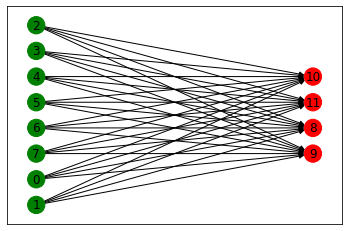

In [36]:
image = graph.plot()

In [40]:
graph.nodes

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],

In [37]:
nca = GraphNCA(graph, NUM_HIDDEN_CHANNELS)

In [38]:
from tqdm import tqdm


policy = LunarLanderNCAPolicy(nca,num_growth_steps=16)
policy = policy.to(device)

In [39]:
bar = tqdm(np.arange(50000))

writer = get_tensorboard_logger("ReinforceLunarLander")
optimizer = ReinforceOptimizer(policy, lr=0.001)

for i in bar:
    observations, actions, rewards = optimizer.rollout(reinforce_rollout, env_name = "LunarLander-v2")

    torch_observations = torch.from_numpy(observations).to(policy.device)
    torch_actions = torch.from_numpy(actions).float().to(policy.device)
    torch_rewards = torch.from_numpy(rewards).float().to(policy.device)


    optimizer.zero_grad()
    loss = optimizer.loss_fn(torch_observations, torch_actions, torch_rewards)
    loss.backward()
    torch.nn.utils.clip_grad_norm_(policy.parameters(), 10.0)
    optimizer.step()

    # metrics

    grad_dict = {}
    for n, W in policy.named_parameters():
        if W.grad is not None:
            grad_dict["{}_grad".format(n)] = float(torch.sum(W.grad).item())

    loss = loss.item()
    sum_reward = np.sum(rewards)

    metrics_dict = {"loss":loss, "sum_reward":sum_reward, **grad_dict}

    for key in metrics_dict:
        writer.add_scalar(key, metrics_dict[key], i)


    bar.set_description("Loss: {}, Reward: {}".format(loss, sum_reward))

  0%|                                                                         | 0/50000 [00:00<?, ?it/s]

Follow tensorboard logs with: tensorboard --logdir '/home/shyam/Code/growing-nn/notebooks/tensorboard_logs/ReinforceLunarLander_2022-08-14 16:52:22.039353'


  0%|                                                                         | 0/50000 [00:01<?, ?it/s]


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument index in method wrapper__index_select)